# Introduction

Stochastic Gradient Descent is a popular optimization technique used for minimizing a loss function. The technique performs gradient descent step by step in a stochastic manner, i.e., by randomly selecting samples for each iteration. The method is efficient, especially for fitting linear models. However, convergence is not guaranteed at each iteration, and the loss function may not necessarily decrease at each iteration. In this case, monitoring the convergence on the loss function can be difficult. In this lab, we will explore the early stopping strategy, which is an approach for monitoring convergence on a validation score. We will use the **SGDClassifier** model from the scikit-learn library and the MNIST dataset to illustrate how early stopping can be used to achieve almost the same accuracy as compared to a model built without early stopping, and significantly reduce training time.

# Load the necessary libraries and MNIST dataset

The first step is to load the necessary libraries and dataset. We will be using **pandas**, **numpy**, **matplotlib**, and **scikit-learn** libraries. We will also use the **fetch_openml** function from scikit-learn to load the MNIST dataset.

In [1]:
import time
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle

# Load the MNIST dataset
def load_mnist(n_samples=None, class_0="0", class_1="8"):
    """Load MNIST, select two classes, shuffle and return only n_samples."""
    # Load data from http://openml.org/d/554
    mnist = fetch_openml("mnist_784", version=1, as_frame=False, parser="pandas")

    # take only two classes for binary classification
    mask = np.logical_or(mnist.target == class_0, mnist.target == class_1)

    X, y = shuffle(mnist.data[mask], mnist.target[mask], random_state=42)
    if n_samples is not None:
        X, y = X[:n_samples], y[:n_samples]
    return X, y

X, y = load_mnist(n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Define the estimator and the early stopping strategy

The next step is to define the estimator and the early stopping strategy. We will be using the **SGDClassifier** model from scikit-learn. We will define three different stopping criteria: no stopping criterion, training loss, and validation score. We will use the **fit_and_score** function to fit the estimator on the train set and score it on both sets.

In [2]:
@ignore_warnings(category=ConvergenceWarning)
def fit_and_score(estimator, max_iter, X_train, X_test, y_train, y_test):
    """Fit the estimator on the train set and score it on both sets"""
    estimator.set_params(max_iter=max_iter)
    estimator.set_params(random_state=0)

    start = time.time()
    estimator.fit(X_train, y_train)

    fit_time = time.time() - start
    n_iter = estimator.n_iter_
    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return fit_time, n_iter, train_score, test_score

# Define the estimator to compare
estimator_dict = {
    "No stopping criterion": linear_model.SGDClassifier(n_iter_no_change=3),
    "Training loss": linear_model.SGDClassifier(
        early_stopping=False, n_iter_no_change=3, tol=0.1
    ),
    "Validation score": linear_model.SGDClassifier(
        early_stopping=True, n_iter_no_change=3, tol=0.0001, validation_fraction=0.2
    ),
}

# Train and evaluate the estimator

The next step is to train and evaluate the estimator using each stopping criterion. We will use a loop to iterate over each estimator and stopping criterion, and we will use another loop to iterate over different maximum iterations. We will then store the results in a pandas dataframe for easy plotting.

In [3]:
results = []
for estimator_name, estimator in estimator_dict.items():
    print(estimator_name + ": ", end="")
    for max_iter in range(1, 50):
        print(".", end="")
        sys.stdout.flush()

        fit_time, n_iter, train_score, test_score = fit_and_score(
            estimator, max_iter, X_train, X_test, y_train, y_test
        )

        results.append(
            (estimator_name, max_iter, fit_time, n_iter, train_score, test_score)
        )
    print("")

# Transform the results in a pandas dataframe for easy plotting
columns = [
    "Stopping criterion",
    "max_iter",
    "Fit time (sec)",
    "n_iter_",
    "Train score",
    "Test score",
]
results_df = pd.DataFrame(results, columns=columns)

No stopping criterion: .................................................
Training loss: .................................................
Validation score: .................................................


# Plot the results

The final step is to plot the results. We will use two subplots to plot the train and test scores, and the number of iterations and fit time. We will use different line styles for each estimator and stopping criterion.

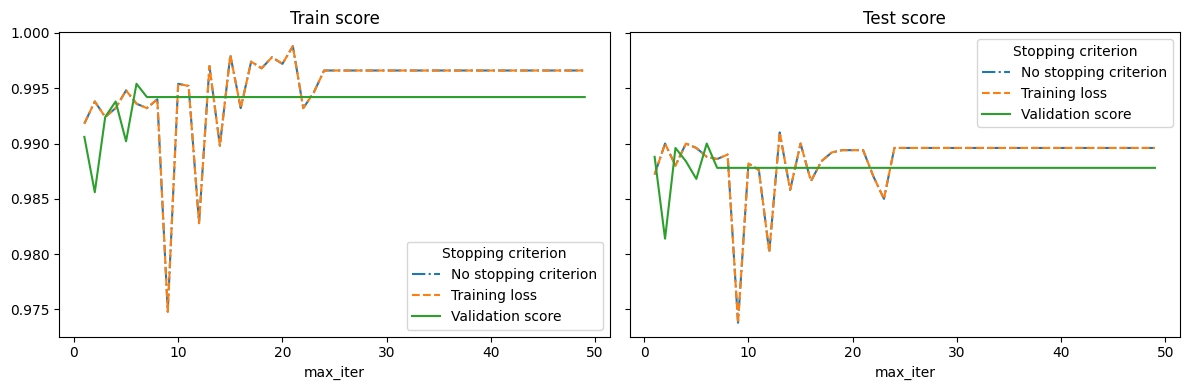

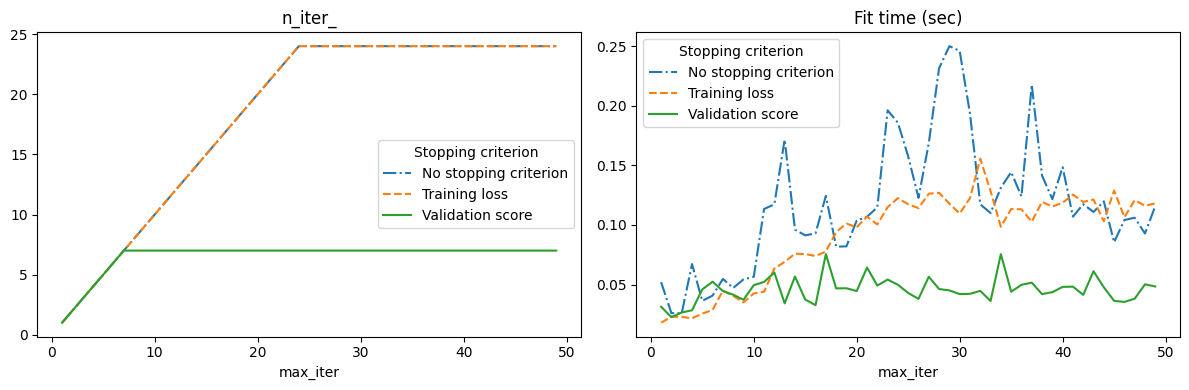

In [4]:
# Define what to plot
lines = "Stopping criterion"
x_axis = "max_iter"
styles = ["-.", "--", "-"]

# First plot: train and test scores
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))
for ax, y_axis in zip(axes, ["Train score", "Test score"]):
    for style, (criterion, group_df) in zip(styles, results_df.groupby(lines)):
        group_df.plot(x=x_axis, y=y_axis, label=criterion, ax=ax, style=style)
    ax.set_title(y_axis)
    ax.legend(title=lines)
fig.tight_layout()

# Second plot: n_iter and fit time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for ax, y_axis in zip(axes, ["n_iter_", "Fit time (sec)"]):
    for style, (criterion, group_df) in zip(styles, results_df.groupby(lines)):
        group_df.plot(x=x_axis, y=y_axis, label=criterion, ax=ax, style=style)
    ax.set_title(y_axis)
    ax.legend(title=lines)
fig.tight_layout()

plt.show()

# Summary

In this lab, we explored the early stopping strategy for monitoring convergence on a validation score when using Stochastic Gradient Descent to minimize a loss function. We used the **SGDClassifier** model from scikit-learn and the MNIST dataset to illustrate how early stopping can be used to achieve almost the same accuracy as compared to a model built without early stopping, and significantly reduce training time. We defined three different stopping criteria: no stopping criterion, training loss, and validation score, and used a loop to train and evaluate the estimator using each stopping criterion. We then plotted the results using different line styles for each estimator and stopping criterion.